In [1]:
#import the required packages
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding



In [2]:
#loading data
df = pd.read_csv("CoronaTweetsSentimentAnalysis.csv")

In [3]:
#displaying the data
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


In [4]:
#data preprocessing
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [5]:
tweet_df = df[['OriginalTweet','Sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(1988, 2)


,OriginalTweet,Sentiment
0,When I couldn't find hand sanitizer at Fred Me...,Positive
1,#Panic buying hits #NewYork City as anxious sh...,Negative
2,Voting in the age of #coronavirus = hand sanit...,Positive
3,Best quality couches at unbelievably low price...,Positive
4,While we were busy watching election returns a...,Positive


In [6]:

tweet_df["Sentiment"].value_counts()

Negative    1041
Positive     947
Name: Sentiment, dtype: int64

In [7]:
#numeric representation
sentiment_label = tweet_df.Sentiment.factorize()
sentiment_label

(array([0, 1, 0, ..., 1, 0, 1], dtype=int64),
 Index(['Positive', 'Negative'], dtype='object'))

In [45]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
print("Few stop words: ", list(my_stop_words)[0:10])

Few stop words:  ['i', 'done', 'fifteen', 'find', 'something', 'to', 'top', 'becoming', 'of', 'whatever']


In [26]:
#feature extraction
from sklearn.model_selection import train_test_split
reviews = df['OriginalTweet'].values 
labels = df['Sentiment'].values
reviews_train, reviews_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=1000)


In [27]:
#tokenization
tweet = tweet_df.OriginalTweet.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [28]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, '\r\r': 3, 'and': 4, 'covid': 5, '19': 6, 'of': 7, 'in': 8, 'a': 9, 't': 10, 'co': 11, 'https': 12, 'coronavirus': 13, 'food': 14, 'for': 15, 'is': 16, 'i': 17, 'on': 18, 'are': 19, 'you': 20, 'store': 21, 'at': 22, 'grocery': 23, 'this': 24, 'stock': 25, 'people': 26, 'have': 27, 'up': 28, 'be': 29, 'that': 30, 'all': 31, 'we': 32, 'or': 33, 'with': 34, 'it': 35, 'my': 36, 'not': 37, 'your': 38, 'shopping': 39, 'supermarket': 40, 'amp': 41, 'online': 42, 'as': 43, 'out': 44, 'if': 45, 'they': 46, 'will': 47, 'panic': 48, 'from': 49, 'prices': 50, 'no': 51, 'so': 52, 'about': 53, 'but': 54, 'toilet': 55, 'just': 56, 'like': 57, 'paper': 58, 'can': 59, 'need': 60, 'get': 61, 'our': 62, 'now': 63, 'more': 64, 'has': 65, 'was': 66, 'buying': 67, 'go': 68, 'covid19': 69, 'who': 70, 'me': 71, 'how': 72, 'what': 73, 'do': 74, 'by': 75, 'going': 76, 'because': 77, 'their': 78, 'time': 79, 'some': 80, 'there': 81, 'local': 82, 'retail': 83, 'when': 84, 'an': 85, 'home': 86,

In [29]:
print(tweet[0])
print(encoded_docs[0])

When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY
[84, 17, 1310, 251, 117, 191, 22, 2398, 2399, 17, 3607, 2, 223, 54, 3608, 3609, 15, 9, 95, 904, 7, 3610, 262, 44, 72, 13, 553, 19, 1128, 28, 50, 12, 10, 11, 3611]


In [30]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   84   17 1310
  251  117  191   22 2398 2399   17 3607    2  223   54 3608 3609   15
    9   95  904    7 3610  262   44   72   13  553   19 1128   28   50
   12 

In [31]:
#model building
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           308928    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 325,579
Trainable params: 325,579
Non-trainable params: 0
________________________________________________

In [32]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
50/50 [==============================] - 9s 116ms/step - loss: 0.6922 - accuracy: 0.5252 - val_loss: 0.6950 - val_accuracy: 0.4925
Epoch 2/5
50/50 [==============================] - 6s 125ms/step - loss: 0.6891 - accuracy: 0.5396 - val_loss: 0.6927 - val_accuracy: 0.4925
Epoch 3/5
50/50 [==============================] - 8s 158ms/step - loss: 0.6451 - accuracy: 0.6352 - val_loss: 0.6755 - val_accuracy: 0.5477
Epoch 4/5
50/50 [==============================] - 7s 150ms/step - loss: 0.5810 - accuracy: 0.7044 - val_loss: 0.6694 - val_accuracy: 0.6005
Epoch 5/5
50/50 [==============================] - 8s 161ms/step - loss: 0.4341 - accuracy: 0.8013 - val_loss: 0.7345 - val_accuracy: 0.5980


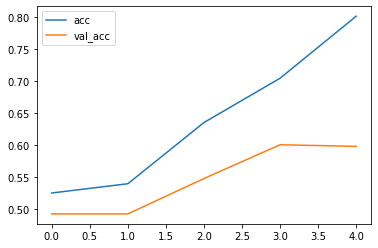

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

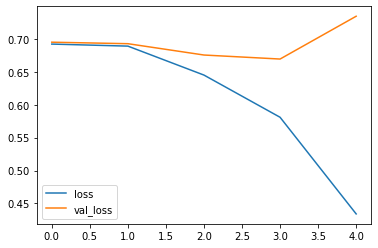

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [35]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [36]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This covid made us panic!"

predict_sentiment(test_sentence2)

text_sentence3="omg all these HOT people jogging outside ??? I went to grab some air and stop by the supermarket and literally everyone is working out outside "
predict_sentiment(text_sentence3)

1/1 [==============================] - 0s 257ms/step
Predicted label:  Positive
1/1 [==============================] - 0s 31ms/step
Predicted label:  Positive
1/1 [==============================] - 0s 16ms/step
Predicted label:  Negative
